In [1]:
import numpy as np
import networkx as nx
import scipy

In [2]:
f = scipy.io.loadmat('flow.mat')["flow"].reshape(28,)

In [3]:
f

array([ 7524,  6537, 11139,  9282,  9282,  6398,  6728,  5988,  5951,
        9557,  7423,  7423,  6814,  8536,  7652,  6537, 11924,  9640,
        8161,  8603,  7974,  9446,  5562,  6719,  9455,  6686, 10833,
        7403], dtype=uint16)

In [4]:
C = scipy.io.loadmat('capacities.mat')["capacities"].reshape(28,)

In [5]:
C

array([ 8741,  9864, 13350, 10926, 13707,  6960,  7422,  6678,  6297,
       11102,  8899,  8970,  9753,  9719,  9083,  7416, 13353, 11216,
       10947, 10019,  8732, 10763,  6677,  9403, 10355,  9067, 11990,
        8258], dtype=uint16)

In [6]:
B = scipy.io.loadmat('traffic.mat')["traffic"]

In [7]:
B

array([[ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  1,  0,  0, -1,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  

In [8]:
l = scipy.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)

In [9]:
l

array([0.14583 , 0.044833, 0.129   , 0.18667 , 0.12983 , 0.078333,
       0.094   , 0.057333, 0.14167 , 0.10517 , 0.10667 , 0.10483 ,
       0.11233 , 0.1805  , 0.1215  , 0.080667, 0.075333, 0.056667,
       0.032667, 0.035   , 0.066667, 0.11283 , 0.078333, 0.054167,
       0.095833, 0.073   , 0.165   , 0.14867 ])

In [10]:
nodes = []
for n in range (1, B.shape[0]+1):
    nodes.append(n)

In [11]:
nodes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [12]:
edges = {}
for e in range(0, B.shape[1]):
    for n in range(0, B.shape[0]):
        if B[n][e] == +1:
            n1 = n+1
        if B[n][e] == -1:
            n2 = n+1
    edge_name = "e"+str(e+1)
    edges[(n1, n2)] = edge_name
        

In [13]:
edges

{(1, 2): 'e1',
 (2, 3): 'e2',
 (3, 4): 'e3',
 (4, 5): 'e4',
 (1, 6): 'e5',
 (6, 7): 'e6',
 (7, 8): 'e7',
 (8, 9): 'e8',
 (9, 13): 'e9',
 (2, 7): 'e10',
 (3, 8): 'e11',
 (3, 9): 'e12',
 (4, 9): 'e13',
 (5, 14): 'e14',
 (6, 10): 'e15',
 (10, 11): 'e16',
 (10, 15): 'e17',
 (7, 10): 'e18',
 (8, 11): 'e19',
 (9, 12): 'e20',
 (11, 12): 'e21',
 (12, 13): 'e22',
 (13, 14): 'e23',
 (11, 15): 'e24',
 (13, 17): 'e25',
 (14, 17): 'e26',
 (15, 16): 'e27',
 (16, 17): 'e28'}

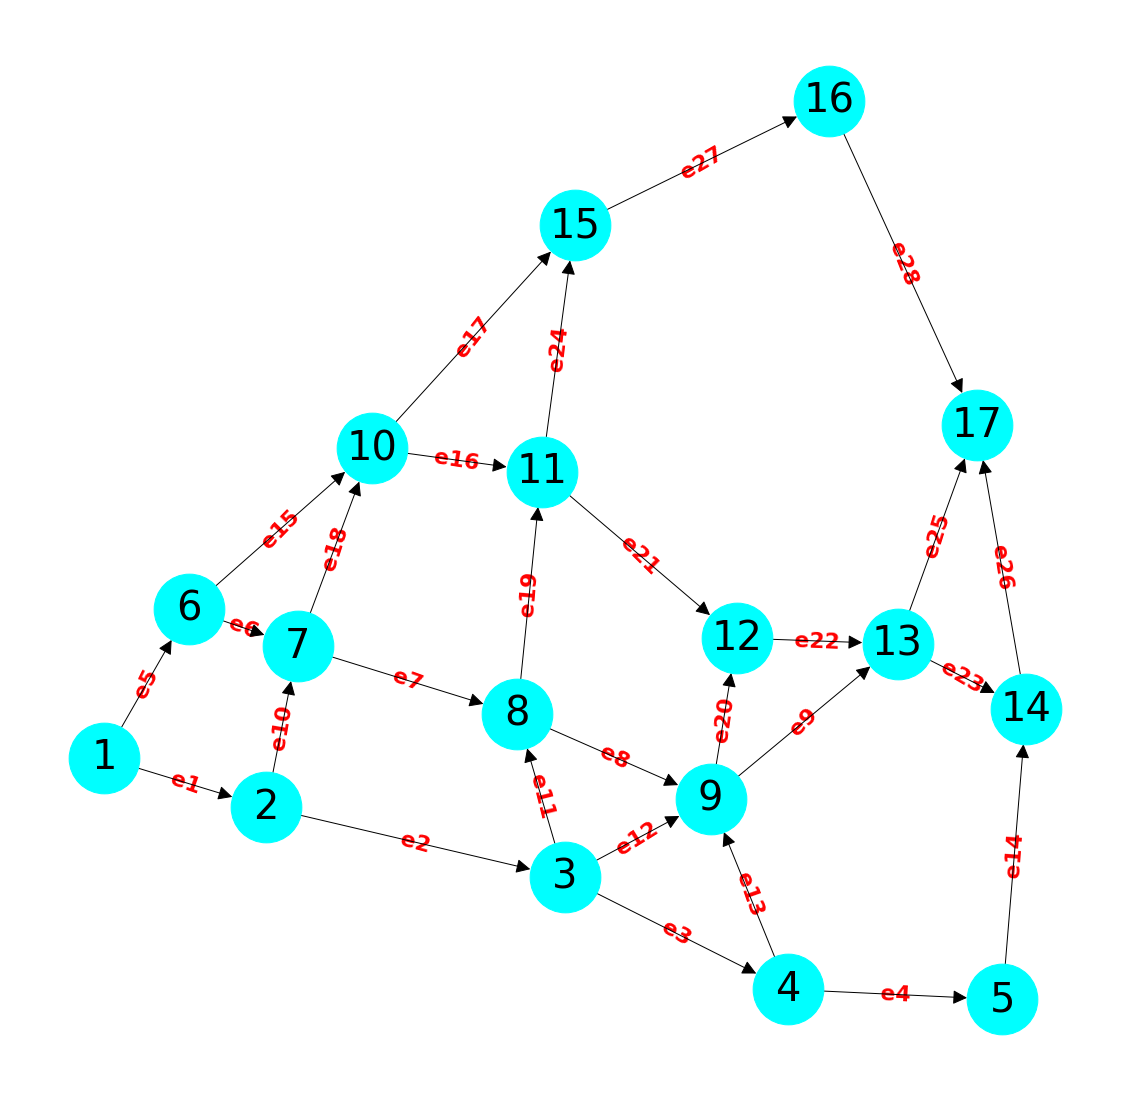

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.DiGraph()
G.add_edges_from(edges.keys())

pos = nx.spectral_layout(G) 
plt.figure(figsize=(20, 20))
nx.draw_networkx_edge_labels(G, pos, edge_labels=edges, font_color='red', font_size=22, font_weight='bold')
nx.draw(G, pos, node_color='#00ffff', arrowsize=30, node_size=5000, font_size=40, with_labels=True)

**Point a.** 

Shortest path (with respect to $l$) from $1$ to $17$ in the previuos graph.

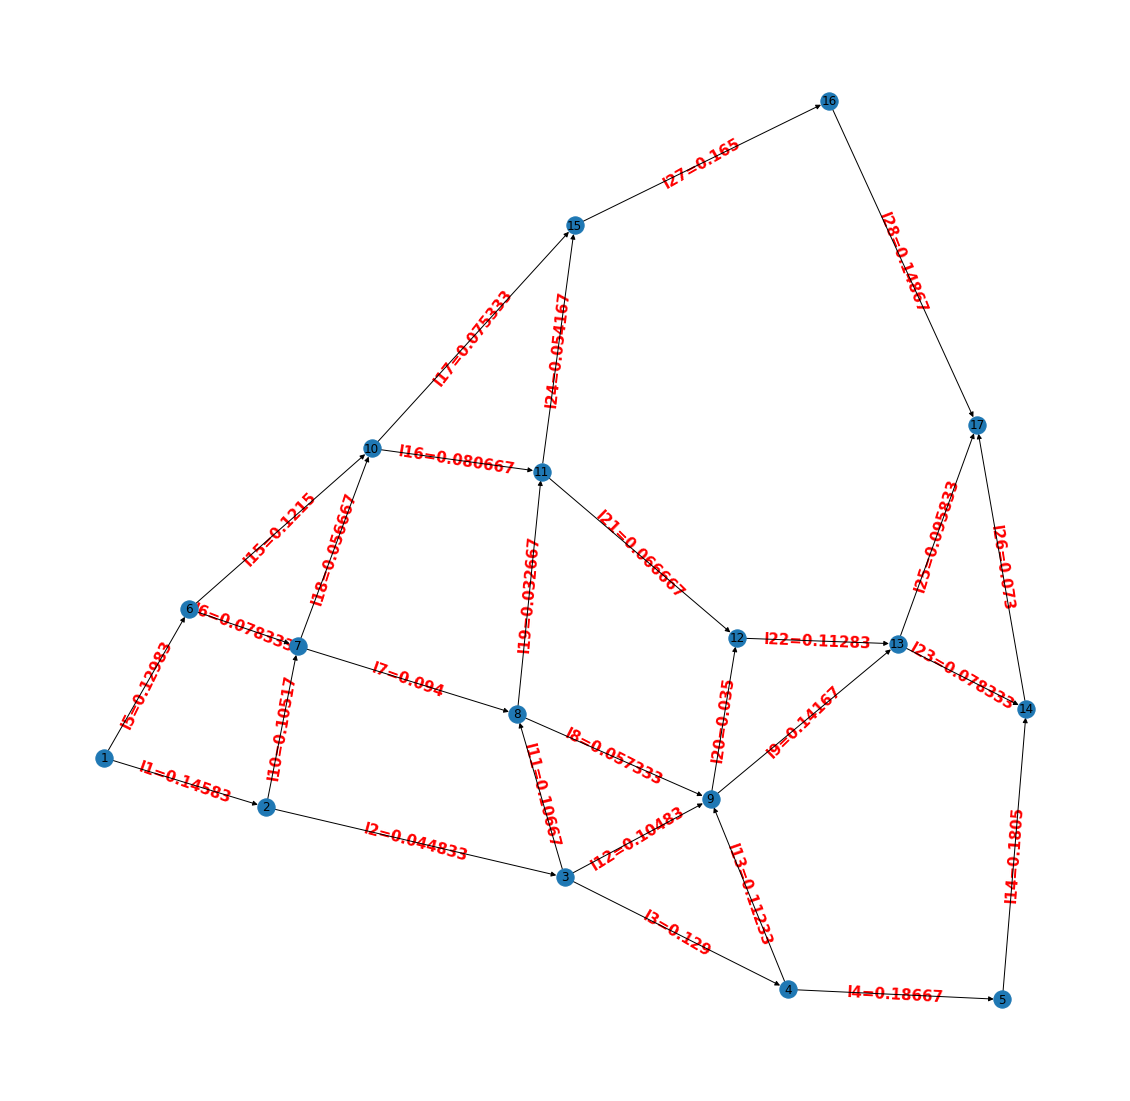

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.DiGraph()
G.add_edges_from(edges.keys())

pos = nx.spectral_layout(G) 
plt.figure(figsize=(20, 20))
edge_lab = {k: 'l'+v[1:]+'='+str(l[int(v[1:])-1]) for k, v in edges.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_lab, font_color='red', font_size=15, font_weight='bold')
nx.draw(G, pos, with_labels=True)

In [16]:
import cvxpy as cp

origin = 1-1 # in B, nodes starts from 0 (row number)
destination = 17-1 # in B, nodes starts from 0 (row number)

nu = np.zeros(B.shape[0])
nu[origin] = 1
nu[destination] = -1
# exogenous flow vector: one unit of flow enters the origin and exits the destination node
tau = 1
nu = nu * tau

# l stores the coefficients of the linear terms of the objective function

f = cp.Variable(B.shape[1])
objective = cp.Minimize(l.T @ f)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

result = prob.solve()
print("Optimal value:", result)
print("Optimal f:", f.value)

Optimal value: 0.5329960000339219
Optimal f: [1.00000000e+00 1.00000000e+00 1.19595586e-11 5.07129566e-12
 1.49988426e-10 1.33658919e-10 8.54100951e-11 3.78266693e-11
 9.99999998e-01 8.90389208e-12 3.91753215e-11 1.00000000e+00
 6.88981434e-12 5.07752202e-12 1.62878397e-11 5.42208640e-11
 1.91831469e-11 5.71274798e-11 8.67469798e-11 1.99611946e-09
 1.29358670e-10 2.12547935e-09 4.14939343e-11 1.16133834e-11
 1.00000000e+00 4.65871714e-11 3.08330688e-11 3.08494486e-11]


Shortest path value (i.e.: path with shortest travelling time $l$) and shortest path nodes.

In [17]:
col = np.where(np.round_(f.value, 5)==1)[0]  # index of columns of B corresponding to links such that their flow (in f.value) are equals 1.
link_of_path = B[:, col] # columns of B corresponding to links such that their flow (in f.value) are equals 1.

# find nodes belonging to the shortest path.
nodes_of_path = []
head_node = -1 # head node of the first link unknown
tail_node = origin # start from origin as tail node of the first link
nodes_of_path.append(tail_node) # first node of the path: origin node
while head_node!=destination: # loop untill 'head_node' is the destination
    links = link_of_path[tail_node] # possible links from 'tail_node' (+1 if present, 0 if absent)
    link = np.where(links==+1)[0][0] # find the link 'link' from 'tail_node'
    head_node = np.where(link_of_path[:,link]==-1)[0][0] # find the head node of 'link' and store in 'head_node'
    tail_node = head_node # tail node of the next link is head node of the previuos one
    nodes_of_path.append(tail_node) # add the node to the path 

    
print("Shortest path value:", result)
print("Shortest path nodes:", [n+1 for n in nodes_of_path]) # printed with respect to the plot, where nodes in G starts from 1

Shortest path value: 0.5329960000339219
Shortest path nodes: [1, 2, 3, 9, 13, 17]


**Point b.** 

Maximum flow between $1$ and $17$ in the previuos graph.

In [18]:
origin = 1 # in G, nodes starts from 1
destination = 17 # in G, nodes starts from 1
for k,v in edges.items():
    # edge name (value of 'edges') is in the form 'e_i_' where i is the number of the edge with respect to the position in B (number of column+1)
    index = int(v[1:])-1 # retrieve position in B
    capacity = C[index] # use the position to find the corresponding capacity in C
    # tail and head node stored in key of 'edge'
    nodes = k
    G[nodes[0]][nodes[1]]['capacity'] = capacity

In [19]:
maximal_throughput, flows = nx.algorithms.flow.maximum_flow(G,origin,destination)
print("Maximum flow: \n", maximal_throughput)
print("Flows: \n", flows)

Maximum flow: 
 22448
Flows: 
 {1: {2: 8741, 6: 13707}, 2: {3: 8741, 7: 0}, 3: {4: 0, 8: 0, 9: 8741}, 4: {5: 0, 9: 0}, 5: {14: 0}, 6: {7: 4624, 10: 9083}, 7: {8: 4624, 10: 0}, 8: {9: 4624, 11: 0}, 9: {13: 6297, 12: 7068}, 13: {14: 3835, 17: 10355}, 14: {17: 3835}, 10: {11: 825, 15: 8258}, 11: {12: 825, 15: 0}, 15: {16: 8258}, 12: {13: 7893}, 17: {}, 16: {17: 8258}}


**Point c.** 

External inflow $\nu$ satisfying $Bf = \nu$

In [20]:
f = scipy.io.loadmat('flow.mat')["flow"].reshape(28,) # reload f for the sake of clarity

In [21]:
nu = B @ f

In [22]:
print("External inflow nu\n", nu)

External inflow nu
 [ 16806   8570  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


In [23]:
#In the following:
tau = nu[0]

**Point d.** 

Social optimum $f^*$ with respect to $\psi_e(f_e) = f_e \tau_e (f_e$), with
$\tau_e(f_e) = \frac{l_e}{1-\frac{f_e}{c_e}}, 0 \le f_e < c_e$; $\tau_e(f_e) = +\infty, f_e \ge c_e$

In [24]:
origin = 1-1 # in B, nodes starts from 0 (row number)
destination = 17-1 # in B, nodes starts from 0 (row number)

nu = np.zeros(B.shape[0])
nu[origin] = 1
nu[destination] = -1
nu = nu * tau

f = cp.Variable(B.shape[1])
m = l*C
d2 = f.__div__(C)
d1 = np.ones(B.shape[1])
expr = d1-d2
v = cp.inv_pos(expr) # expr2 > 0 -> f_e < c_e 
objective = cp.Minimize(m.T @ v - l.T @ C)
constraints = [B @ f == nu, f >= 0, f <= C]
prob = cp.Problem(objective, constraints)

cost_opt = prob.solve()
opt_flow = f.value # f*
print("Social optimal flow:", opt_flow)
print("Optimal cost:", cost_opt)

Social optimal flow: [6.64219910e+03 6.05893789e+03 3.13232779e+03 3.13232589e+03
 1.01638009e+04 4.63831664e+03 3.00634073e+03 2.54263460e+03
 3.13154448e+03 5.83261212e+02 1.45164550e-02 2.92659559e+03
 1.89781986e-03 3.13232589e+03 5.52548426e+03 2.85427264e+03
 4.88644874e+03 2.21523712e+03 4.63720641e+02 2.33768761e+03
 3.31799129e+03 5.65567890e+03 2.37310712e+03 1.99567283e-03
 6.41411626e+03 5.50543301e+03 4.88645073e+03 4.88645073e+03]
Optimal cost: 25943.62261121288


**Point e.**

Wardrop equilibrium $f^{(0)}$   

$\psi_e(f_e) = \int_0^{f_e} \tau_e(s)~\mathrm{d}s$, with 
$\tau_e(f_e) = \frac{l_e}{1-\frac{f_e}{c_e}}, 0 \le f_e < c_e$; $\tau_e(f_e) = +\infty, f_e \ge c_e$

In [25]:
origin = 1-1 # in B, nodes starts from 0 (row number)
destination = 17-1 # in B, nodes starts from 0 (row number)

nu = np.zeros(B.shape[0])
nu[origin] = 1
nu[destination] = -1
nu = nu * tau

f = cp.Variable(B.shape[1])
m = -(l*C)
d2 = f.__div__(C)
d1 = np.ones(B.shape[1])
expr = d1-d2
v = cp.log(expr) # expr2 > 0 -> f_e < c_e 
objective = cp.Minimize(m.T @ v)
constraints = [B @ f == nu, f >= 0, f <= C]
prob = cp.Problem(objective, constraints)

result_w = prob.solve()
wardrop_eq = f.value # f^(0)
print("Wardrop equilibrium:", wardrop_eq)

Wardrop equilibrium: [6.71564895e+03 6.71564803e+03 2.36740801e+03 2.36740792e+03
 1.00903510e+04 4.64539489e+03 2.80384316e+03 2.28356194e+03
 3.41848003e+03 9.22328268e-04 1.76829408e+02 4.17141061e+03
 8.92024178e-05 2.36740792e+03 5.44495611e+03 2.35317044e+03
 4.93333832e+03 1.84155266e+03 6.97110629e+02 3.03649261e+03
 3.05028094e+03 6.08677356e+03 2.58651143e+03 1.24029072e-04
 6.91874216e+03 4.95391934e+03 4.93333845e+03 4.93333845e+03]


In [26]:
def cost(f):
    tau = l/(1-(f/C))
    return sum((f*tau)) # compute the social cost: sum_e(f_e*tau_e)

cost_w = cost(wardrop_eq) # evaluate the social cost at the Wardrop equilibrium

print("Wardrop cost:", cost_w)

Wardrop cost: 26292.963874629393


In [27]:
PoA = cost_w/cost_opt

print("The price of anarchy:", PoA)

The price of anarchy: 1.013465400289377


**Point e-bis.**

Wardrop equilibrium $f^{(\omega)}$     
$\psi_e(f_e) = \int_0^{f_e} \tau_e^{(\omega_e)}(s)~\mathrm{d}s$, with
$\tau_e^{(\omega_e)}(f_e) = \frac{l_e}{1-\frac{f_e}{c_e}} +\omega_e, 0 \le f_e < c_e$; $\tau_e^{(\omega_e)}(f_e) = +\infty, f_e \ge c_e$     
and $\omega_e = f_e^{*} \tau_e'(f_e^{*})$

In [28]:
def compute_omega(f_e_star, l, C):
    return f_e_star*l*C/(np.power((C-f_e_star),2))

In [29]:
origin = 1-1 # in B, nodes starts from 0 (row number)
destination = 17-1 # in B, nodes starts from 0 (row number)

nu = np.zeros(B.shape[0])
nu[origin] = 1
nu[destination] = -1
nu = nu * tau

f = cp.Variable(B.shape[1])
m = -(l*C)
d2 = f.__div__(C)
d1 = np.ones(B.shape[1])
expr = d1-d2
v = cp.log(expr) # expr2 > 0 -> f_e < c_e 
omega = compute_omega(opt_flow, l, C)
objective = cp.Minimize(m.T @ v + omega.T @ f) # same as before, plus a linear term due to omega_e
constraints = [B @ f == nu, f >= 0, f <= C]
prob = cp.Problem(objective, constraints)

result_w = prob.solve()
wardrop_eq_tolls = f.value # f^(omega)
print("Wardrop equilibrium with tolls:", wardrop_eq_tolls)

Wardrop equilibrium with tolls: [6.64297510e+03 6.05907793e+03 3.13247156e+03 3.13247145e+03
 1.01630248e+04 4.63825748e+03 3.00632468e+03 2.54233942e+03
 3.13149039e+03 5.83897168e+02 4.41635541e-04 2.92660593e+03
 1.13364091e-04 3.13247145e+03 5.52476733e+03 2.85422618e+03
 4.88637111e+03 2.21582997e+03 4.63985699e+02 2.33745508e+03
 3.31821174e+03 5.65566682e+03 2.37303573e+03 1.44842043e-04
 6.41412148e+03 5.50550718e+03 4.88637126e+03 4.88637126e+03]


In [30]:
cost_w_tolls = cost(wardrop_eq_tolls) # evaluate the social cost at the Wardrop equilibrium

print("Wardrop with toll cost:", cost_w_tolls)

Wardrop with toll cost: 25943.62242759806


In [31]:
PoA = cost_w_tolls/cost_opt

print("The price of anarchy:", PoA)

The price of anarchy: 0.9999999929225452


In [32]:
# The wardrop equilibrium f_omega is the same as the social optimum f*, with a precision of 0.7761
# The cost related to the wardrop equilibrium f_omega is the same as the optimal cost, with a precision of 0.00018
# The price of anarchy related to the wardrop equilibrium f_omega is 1, with a precision of 10^-7

In [33]:
max(opt_flow-wardrop_eq_tolls)

0.776085587705893

In [34]:
cost_opt-cost_w_tolls

0.0001836148185248021

**Point f.**

Social optimum $f^*$ with respect to $\psi_e(f_e) = f_e (\tau_e (f_e))$, with
$\tau_e(f_e) = \frac{l_e}{1-\frac{f_e}{c_e}} - l_e, 0 \le f_e < c_e$; $\tau_e(f_e) = +\infty, f_e \ge c_e$

In [35]:
origin = 1-1 # in B, nodes starts from 0 (row number)
destination = 17-1 # in B, nodes starts from 0 (row number)

nu = np.zeros(B.shape[0])
nu[origin] = 1
nu[destination] = -1
nu = nu * tau

f = cp.Variable(B.shape[1])
m = l*C
d2 = f.__div__(C)
d1 = np.ones(B.shape[1])
expr = d1-d2
v = cp.inv_pos(expr) # expr2 > 0 -> f_e < c_e 
objective = cp.Minimize(m.T @ v - l.T @ C - l.T @ f) # same as before, minus a linear term 
constraints = [B @ f == nu, f >= 0, f <= C]
prob = cp.Problem(objective, constraints)

cost_opt = prob.solve()
opt_flow = f.value # f*
print("Social optimal flow:", opt_flow)
print("Optimal cost:", cost_opt)

Social optimal flow: [6.65329658e+03 5.77466230e+03 3.41971657e+03 3.41971062e+03
 1.01527034e+04 4.64278036e+03 3.10584008e+03 2.66218478e+03
 3.00907935e+03 8.78634280e+02 7.42401749e-03 2.35493830e+03
 5.94907576e-03 3.41971062e+03 5.50992306e+03 3.04369256e+03
 4.88180506e+03 2.41557456e+03 4.43662730e+02 2.00804968e+03
 3.48735309e+03 5.49540277e+03 2.20377848e+03 2.20338871e-03
 6.30070364e+03 5.62348910e+03 4.88180726e+03 4.88180726e+03]
Optimal cost: 15095.513524607868


Wardrop equilibrium $f^{(0)}$     
$\psi_e(f_e) = \int_0^{f_e} \tau_e(s)~\mathrm{d}s$, with 
$\tau_e(f_e) = \frac{l_e}{1-\frac{f_e}{c_e}} - l_e, 0 \le f_e < c_e$; $\tau_e(f_e) = +\infty, f_e \ge c_e$

In [36]:
origin = 1-1 # in B, nodes starts from 0 (row number)
destination = 17-1 # in B, nodes starts from 0 (row number)

nu = np.zeros(B.shape[0])
nu[origin] = 1
nu[destination] = -1
nu = nu * tau

f = cp.Variable(B.shape[1])
m = -(l*C)
d2 = f.__div__(C)
d1 = np.ones(B.shape[1])
expr = d1-d2
v = cp.log(expr) # expr2 > 0 -> f_e < c_e 
objective = cp.Minimize(m.T @ v- l.T @ f) # same as before, minus a linear term 
constraints = [B @ f == nu, f >= 0, f <= C]
prob = cp.Problem(objective, constraints)

result_w = prob.solve()
wardrop_eq = f.value # f^(0)
print("Wardrop equilibrium:", wardrop_eq)

Wardrop equilibrium: [6.78171861e+03 6.00489674e+03 3.26626641e+03 3.26625120e+03
 1.00242813e+04 4.66556349e+03 3.02889540e+03 2.64103584e+03
 3.03881982e+03 7.76821866e+02 2.40309308e+02 2.49832102e+03
 1.52097661e-02 3.26625120e+03 5.35871777e+03 2.88151993e+03
 4.89068780e+03 2.41348995e+03 6.28168876e+02 2.10055225e+03
 3.50968657e+03 5.61023882e+03 2.26259310e+03 2.23404879e-03
 6.38646554e+03 5.52884430e+03 4.89069003e+03 4.89069003e+03]


In [37]:
def cost(f):
    tau = ( l/(1-(f/C)) ) - l # same as before, minus l
    return sum((f*tau)) # compute the social cost: sum_e(f_e*tau_e)

cost_w = cost(wardrop_eq) # evaluate the social cost at the Wardrop equilibrium

print("Wardrop cost:", cost_w)

Wardrop cost: 15148.086835153885


In [38]:
PoA = cost_w/cost_opt

print("The price of anarchy:", PoA)

The price of anarchy: 1.0034827109697404


Wardrop equilibrium $f^{(\omega^*)}$    
$\psi_e(f_e) = \int_0^{f_e} \tau_e^{(\omega^*_e)}(s)~\mathrm{d}s$, with,
$\tau_e^{(\omega^*_e)}(f_e) = \frac{l_e}{1-\frac{f_e}{c_e}} - l_e +\omega^*_e, 0 \le f_e < c_e$; $\tau_e^{(\omega^*_e)}(f_e) = +\infty, f_e \ge c_e$     
and $\omega^*_e = f_e^{*} \tau_e'(f_e^{*})$

In [39]:
origin = 1-1 # in B, nodes starts from 0 (row number)
destination = 17-1 # in B, nodes starts from 0 (row number)

nu = np.zeros(B.shape[0])
nu[origin] = 1
nu[destination] = -1
nu = nu * tau

f = cp.Variable(B.shape[1])
m = -(l*C)
d2 = f.__div__(C)
d1 = np.ones(B.shape[1])
expr = d1-d2
v = cp.log(expr) # expr2 > 0 -> f_e < c_e 
omega = compute_omega(opt_flow, l, C) # same as before
objective = cp.Minimize(m.T @ v - l.T @ f + omega.T @ f) # same as before, minus a linear term
constraints = [B @ f == nu, f >= 0, f <= C]
prob = cp.Problem(objective, constraints)

result_w = prob.solve()
wardrop_eq_tolls = f.value # f^(omega*)
print("Wardrop equilibrium with tolls:", wardrop_eq_tolls)

Wardrop equilibrium with tolls: [6.65313125e+03 5.77541915e+03 3.41948032e+03 3.41947910e+03
 1.01528686e+04 4.64242340e+03 3.10549352e+03 2.66173288e+03
 3.00916867e+03 8.77712096e+02 1.51897306e-03 2.35593731e+03
 1.22684777e-03 3.41947910e+03 5.51044520e+03 3.04337504e+03
 4.88171213e+03 2.41464197e+03 4.43762163e+02 2.00850274e+03
 3.48713672e+03 5.49563946e+03 2.20406969e+03 4.88393528e-04
 6.30073844e+03 5.62354878e+03 4.88171262e+03 4.88171262e+03]


In [40]:
cost_w_tolls = cost(wardrop_eq_tolls) # evaluate the social cost at the Wardrop equilibrium

print("Wardrop with toll cost:", cost_w_tolls)

Wardrop with toll cost: 15095.512878635396


In [41]:
PoA = cost_w_tolls/cost_opt

print("The price of anarchy:", PoA)

The price of anarchy: 0.9999999572076518


In [42]:
# The wardrop equilibrium f_omega is the same as the social optimum f*, with a precision of 0.9325
# The cost related to the wardrop equilibrium f_omega is the same as the optimal cost, with a precision of 0.00065
# The price of anarchy related to the wardrop equilibrium f_omega is 1, with a precision of 10^-7

In [43]:
max(opt_flow-wardrop_eq_tolls)

0.9325858725924263

In [44]:
cost_opt-cost_w_tolls

0.0006459724718297366